imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.datasets import make_regression


Create or Load the Dataset
For regression tasks, we can use make_regression from Scikit-learn to generate a synthetic dataset. If you'd like to work with real-world data, you can load datasets like California Housing or use any dataset with continuous target variables.

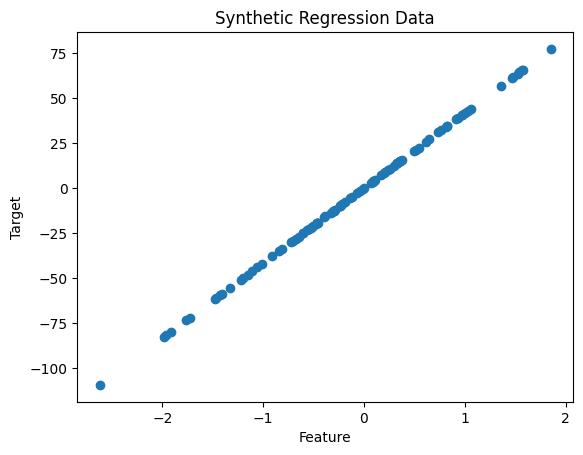

In [4]:
# Generate synthetic regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)

# Visualize the data
plt.scatter(X, y)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Synthetic Regression Data')
plt.show()


Split Data into Training and Testing Sets
Just like with classification, split the dataset into training and testing sets.

In [5]:
# sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train and Evaluate Regression Models
Now, let's train and evaluate three regression algorithms: Linear Regression, Ridge Regression, and Support Vector Regression (SVR).

Linear Regression

In [6]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin_reg = lin_reg.predict(X_test)

print("Linear Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lin_reg))
print("R2 Score:", r2_score(y_test, y_pred_lin_reg))


Linear Regression:
Mean Squared Error: 0.010420222653186971
R2 Score: 0.9999925261586983


Ridge Regression
Ridge regression is a regularized version of linear regression that adds a penalty for large coefficients to avoid overfitting.

In [7]:
ridge_reg = Ridge(alpha=1.0)  # alpha is the regularization parameter
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)

print("Ridge Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_ridge))
print("R2 Score:", r2_score(y_test, y_pred_ridge))


Ridge Regression:
Mean Squared Error: 0.3439908943949024
R2 Score: 0.9997532746238247


Support Vector Regression (SVR)
Support Vector Regression is an extension of the Support Vector Machine (SVM) algorithm to regression tasks. It works well for non-linear data.

In [8]:
svr = SVR(kernel='rbf')  # rbf (Radial Basis Function) kernel is common for non-linear problems
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

print("Support Vector Regression (SVR):")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_svr))
print("R2 Score:", r2_score(y_test, y_pred_svr))


Support Vector Regression (SVR):
Mean Squared Error: 515.5549339674474
R2 Score: 0.6302213602313782


Visualizing the Predictions against the actual values to get an idea of how well each model performs.

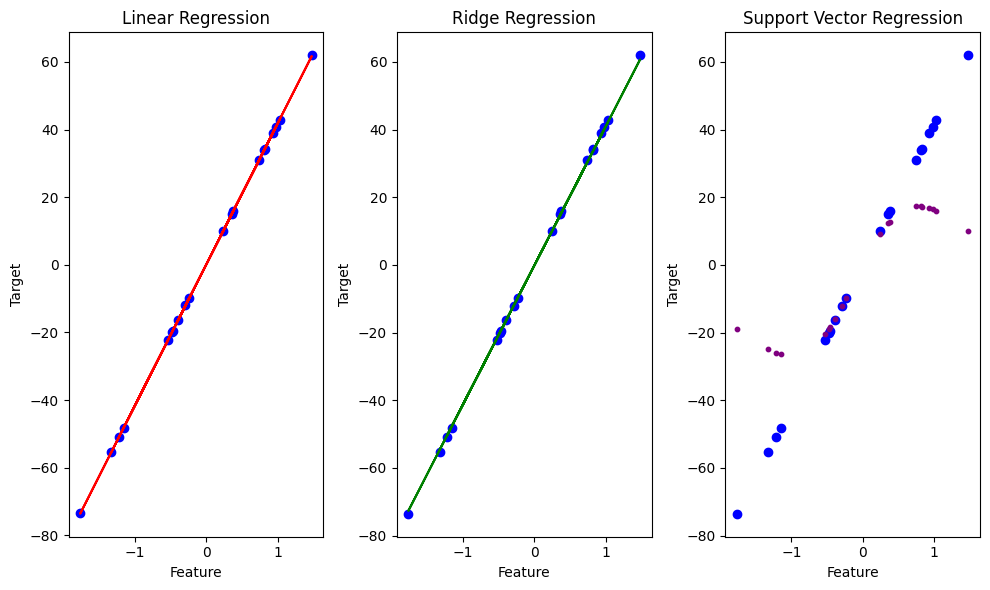

In [9]:
# Plot results for each model
plt.figure(figsize=(10, 6))

# Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_lin_reg, color='red', label='Linear Regression')
plt.title("Linear Regression")
plt.xlabel('Feature')
plt.ylabel('Target')

# Ridge Regression
plt.subplot(1, 3, 2)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_ridge, color='green', label='Ridge Regression')
plt.title("Ridge Regression")
plt.xlabel('Feature')
plt.ylabel('Target')

# Support Vector Regression (SVR)
plt.subplot(1, 3, 3)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred_svr, color='purple', label='SVR', s=10)
plt.title("Support Vector Regression")
plt.xlabel('Feature')
plt.ylabel('Target')

plt.tight_layout()
plt.show()


Model Comparison
You can compare the performance of the models using the Mean Squared Error (MSE) and R² Score, which are standard metrics for regression problems.

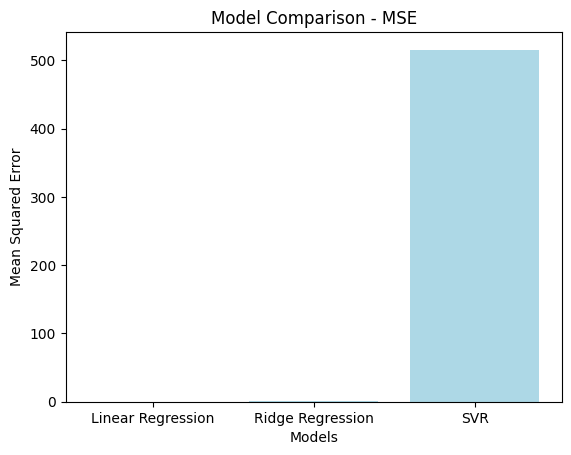

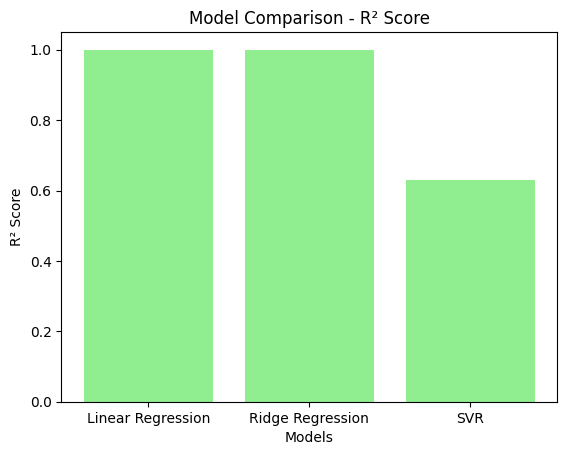

In [17]:
# Compare models' performance
models = ['Linear Regression', 'Ridge Regression', 'SVR']
mse_values = [
    mean_squared_error(y_test, y_pred_lin_reg),
    mean_squared_error(y_test, y_pred_ridge),
    mean_squared_error(y_test, y_pred_svr)
]
r2_values = [
    r2_score(y_test, y_pred_lin_reg),
    r2_score(y_test, y_pred_ridge),
    r2_score(y_test, y_pred_svr)
]

# Plot MSE
plt.bar(models, mse_values, color='lightblue')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Model Comparison - MSE')
plt.show()

# Plot R² Score
plt.bar(models, r2_values, color='lightgreen')
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.title('Model Comparison - R² Score')
plt.show()


Hyperparameter Tuning (Optional)
You can also experiment with hyperparameter tuning using GridSearchCV to improve the performance of models like Ridge Regression and SVR.

Example for Ridge Regression:

In [10]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Ridge Regression
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters for Ridge:", grid_search.best_params_)
print("Best Score for Ridge:", grid_search.best_score_)


Best Parameters for Ridge: {'alpha': 0.1}
Best Score for Ridge: -0.01378706105013606


notes

Linear Regression is simple and works well for linearly separable data.

Ridge Regression improves linear regression by adding regularization, which helps in reducing overfitting.

Support Vector Regression (SVR) is powerful for non-linear data and uses kernels to map data into higher-dimensional spaces.